In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

alphas = [500, 750, 1000, 1250, 1500]  
num_modes = 10                         
num_subjects = 10                      
all_modes = np.zeros((len(alphas), num_modes, num_subjects))  

for alpha_idx, alpha in enumerate(alphas):
    folder_name = f"Results_Alpha_{alpha}"
    for i in range(1, num_subjects + 1):
        omega_file = f"{folder_name}/omega_subject_{i}.mat"
        data = loadmat(omega_file)
        omega = data['omega']
        all_modes[alpha_idx, :, i - 1] = omega[-1, :]

all_modes = all_modes * 0.72 * 10000


## Alpha frequencies

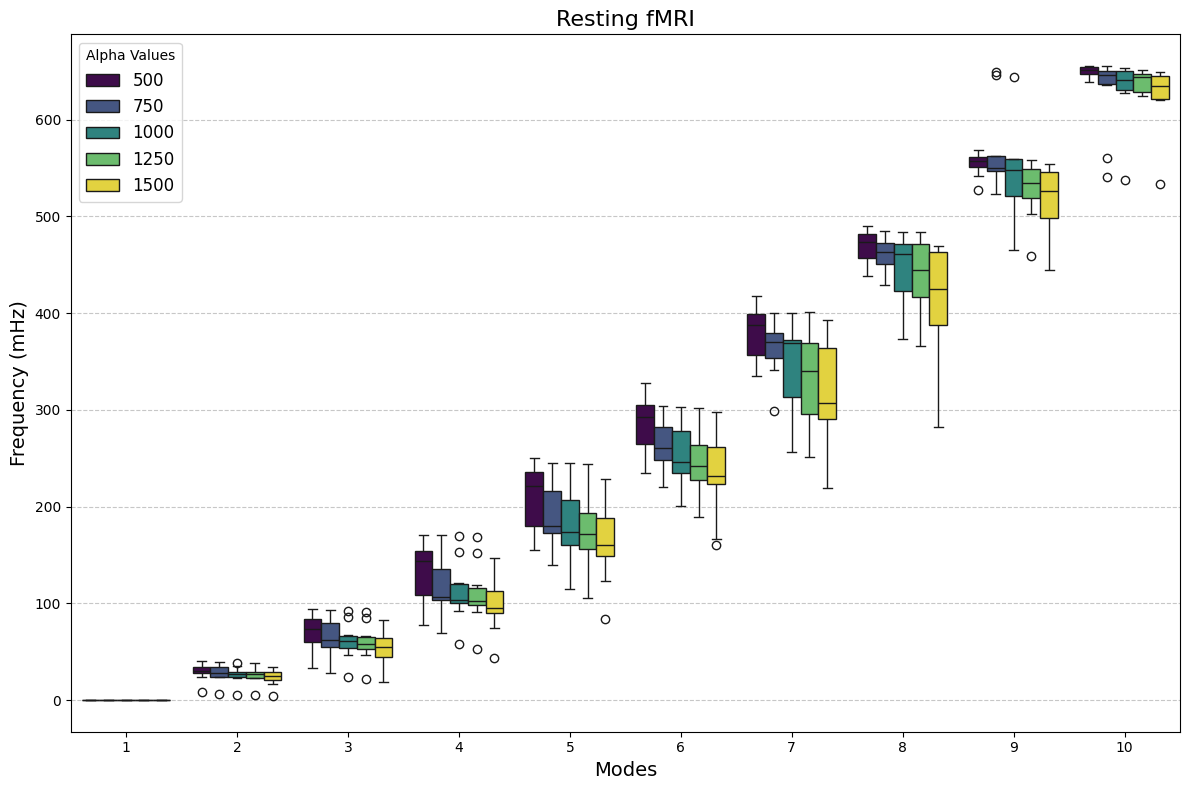

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

alphas = [500, 750, 1000, 1250, 1500]  
num_modes = 10                         
num_subjects = 10                      


data = []

sampling_rate = 1 / 0.72


for alpha_idx, alpha in enumerate(alphas):
    folder_name = f"New_Results_Alpha_{alpha}"
    for i in range(1, num_subjects + 1):
        omega_file = f"{folder_name}/omega_subject_{i}.mat"
        data_mat = loadmat(omega_file)
        omega = data_mat['omega']  
        frequencies = omega[-1, :] * sampling_rate * 1000  # mHz
        
        for mode_idx, freq in enumerate(frequencies, start=1):
            data.append({
                'Alpha': alpha,
                'Mode': mode_idx,
                'Frequency': freq
            })

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Mode", y="Frequency", hue="Alpha", data=df, 
    palette="viridis", showfliers=True
)

plt.xlabel('Modes', fontsize=14)
plt.ylabel('Frequency (mHz)', fontsize=14)
plt.title('Resting fMRI', fontsize=16)
plt.legend(title='Alpha Values', fontsize=12, loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Figures/frequency_alpha')

plt.show()


In [ ]:
mean_modes = np.mean(all_modes, axis=2)  # Mean across subjects
std_modes = np.std(all_modes, axis=2)    # Standard deviation across subjects

# Plot the results
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))  # Generate distinct colors

for alpha_idx, alpha in enumerate(alphas):
    x = np.arange(1, num_modes + 1)  # Mode indices
    y = mean_modes[alpha_idx, :]
    error = std_modes[alpha_idx, :]
    plt.errorbar(x, y, yerr=error, fmt='o-', color=colors[alpha_idx], 
                 label=f'α = {alpha}', linewidth=1.5)

# Add labels, title, and legend
plt.xlabel('Modes', fontsize=12)
plt.ylabel('Frequency (mHz)', fontsize=12)
plt.title(f'Frequency of Each Mode for K = {num_modes}', fontsize=14)
plt.legend(title='Alpha Values', fontsize=10, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## K frequencues

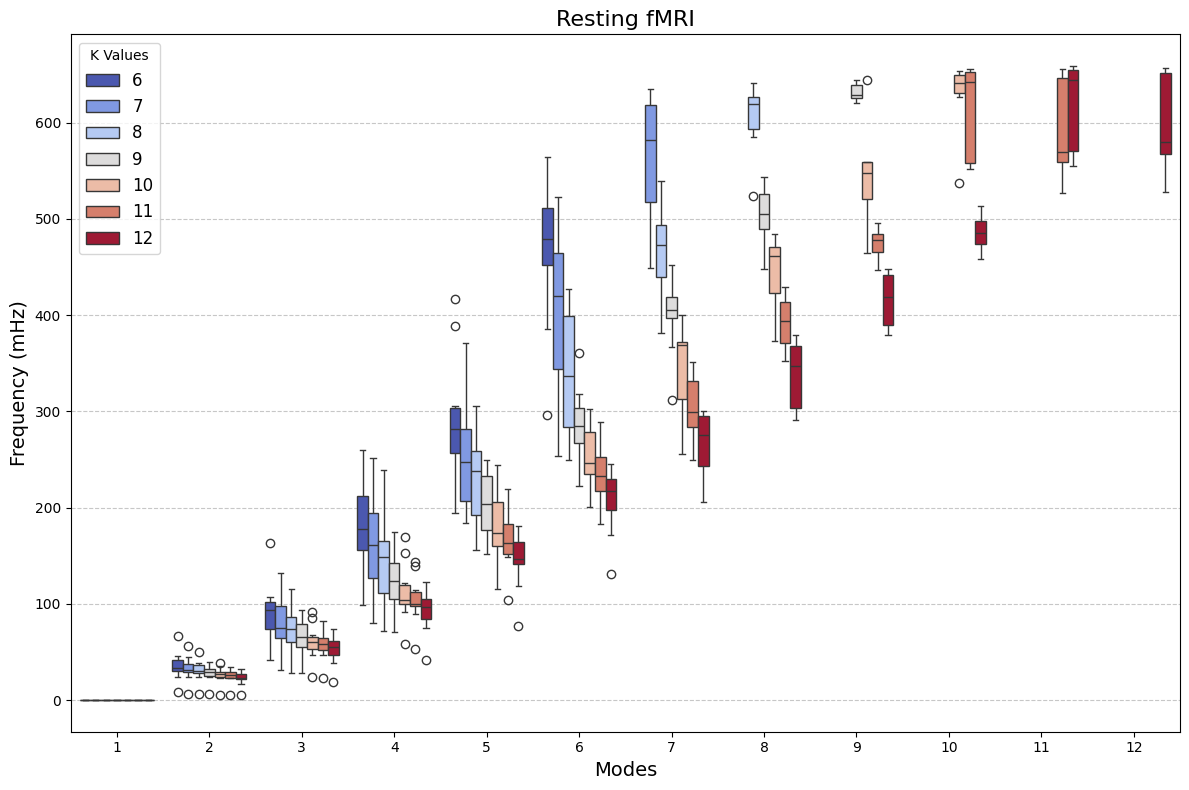

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Configuration
k_values = range(6, 13)               
num_subjects = 10                     
sampling_rate = 1 / 0.72           

data = []

for k in k_values:
    folder_name = f"New_Results_K_{k}"
    for i in range(1, num_subjects + 1):
        omega_file = f"{folder_name}/omega_subject_{i}.mat"
        data_mat = loadmat(omega_file)
        omega = data_mat['omega']  # Extract omega
        frequencies = omega[-1, :] * sampling_rate * 1000 
        
        # Add the data for all modes
        for mode_idx, freq in enumerate(frequencies, start=1):
            data.append({
                'K': k,
                'Mode': mode_idx,
                'Frequency': freq
            })

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Mode", y="Frequency", hue="K", data=df,
    palette="coolwarm", showfliers=True
)

plt.xlabel('Modes', fontsize=14)
plt.ylabel('Frequency (mHz)', fontsize=14)
plt.title('Resting fMRI', fontsize=16)
plt.legend(title='K Values', fontsize=12, loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Figures/frequency_k')

plt.show()


## K energies

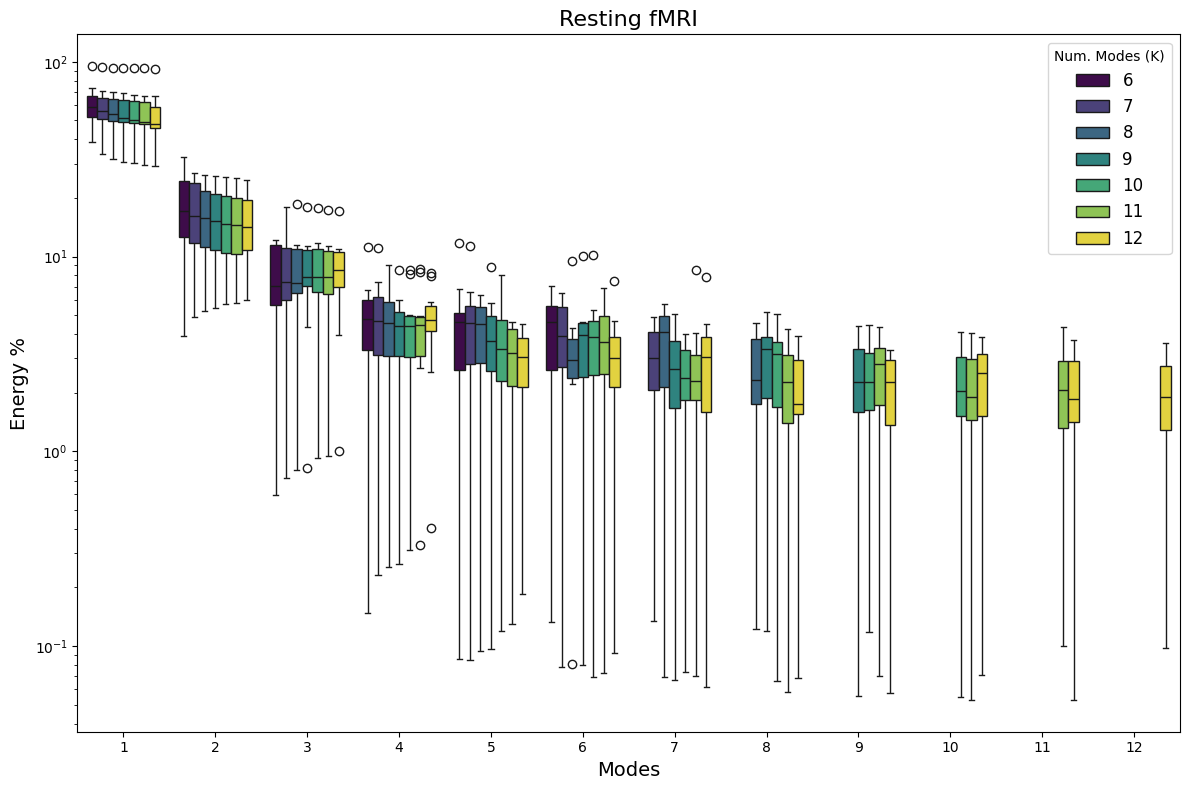

In [22]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = []

num_subjects = 10
#for k in k_values:
for k in k_values:
    folder_name = f"New_Results_K_{k}"
    for i in range(1, num_subjects + 1):
        u_file = f"{folder_name}/u_subject_{i}.mat"
        data_mat = loadmat(u_file)
        u = data_mat['u']
        
        mode_energies = np.sum(np.abs(u)**2, axis=(1, 2))
        total_energy=np.sum(mode_energies)
        #print(mode_energies)
        energies = (mode_energies / total_energy) * 100  
        for mode_idx, energy in enumerate(energies, start=1):
            data.append({
                'K': k,
                'Mode': mode_idx,
                'Energy': energy
            })

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Mode", y="Energy", hue="K", palette="viridis")

plt.yscale("log")  
plt.xlabel("Modes", fontsize=14)
plt.ylabel("Energy %", fontsize=14)
plt.title("Resting fMRI", fontsize=16)
plt.legend(title="Num. Modes (K)", fontsize=12)
plt.tight_layout()
plt.savefig('./Figures/energy_k')


# Show the plot
plt.show()


## Alpha Energies

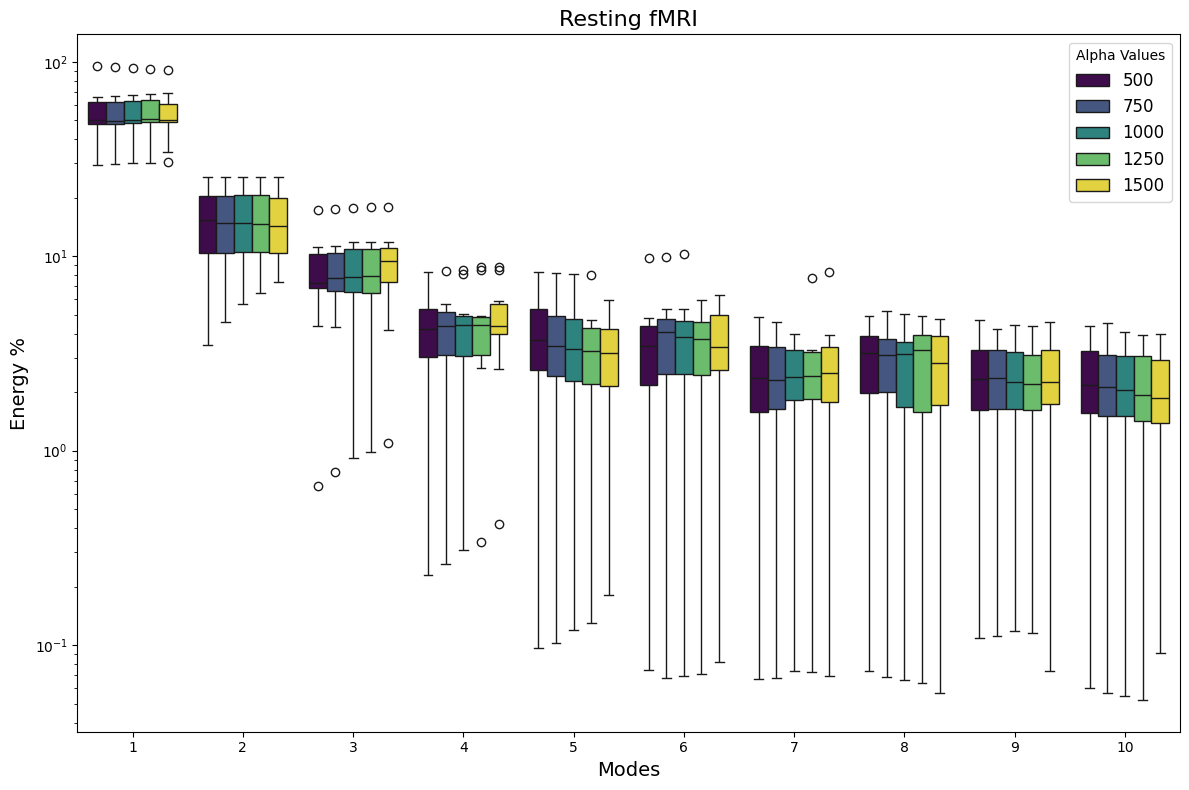

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

alphas = [500, 750, 1000, 1250, 1500]  
num_modes = 10                         
num_subjects = 10                      

data = []

sampling_rate = 1 / 0.72

for alpha_idx, alpha in enumerate(alphas):
    folder_name = f"New_Results_Alpha_{alpha}"
    for i in range(1, num_subjects + 1):
        u_file = f"{folder_name}/u_subject_{i}.mat"
        data_mat = loadmat(u_file)
        u = data_mat['u']
        
        mode_energies = np.sum(np.abs(u)**2, axis=(1, 2))
        total_energy=np.sum(mode_energies)
        #print(mode_energies)
        energies = (mode_energies / total_energy) * 100  
        for mode_idx, energy in enumerate(energies, start=1):
            data.append({
                'Alpha': alpha,
                'Mode': mode_idx,
                'Energy': energy
            })


df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Mode", y="Energy", hue="Alpha", palette="viridis")

plt.yscale("log")  
plt.xlabel("Modes", fontsize=14)
plt.ylabel("Energy %", fontsize=14)
plt.title("Resting fMRI", fontsize=16)
plt.legend(title="Alpha Values", fontsize=12)
plt.tight_layout()
plt.savefig('./Figures/energy_alpha')

# Show the plot
plt.show()


## MEMD vs MVMD Results frequency

/Users/kostasvos/MATLAB/Projects/Assignment 3/.venv/lib/python3.13/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 116, using nperseg = 116
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


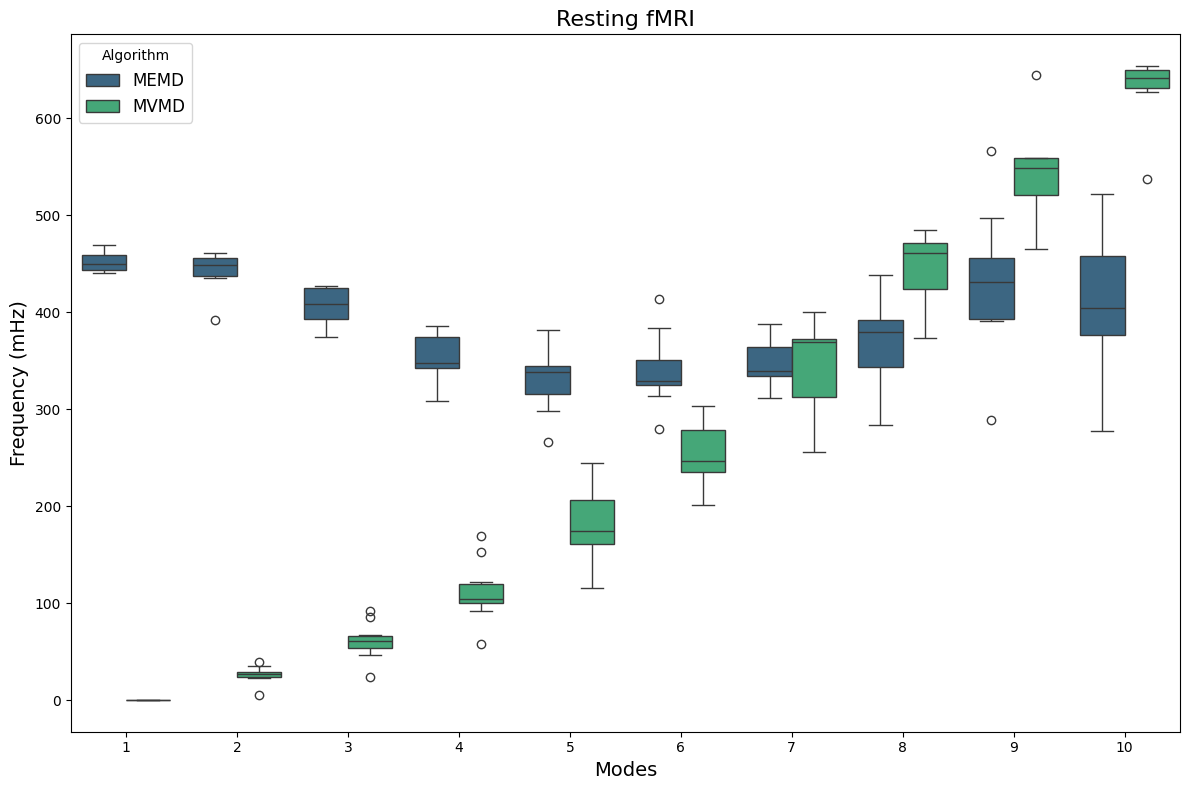

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

num_modes = 10                         
num_subjects = 10                      

from scipy.signal import welch

def calculate_central_frequency(data, fs):
    central_frequencies = []
    for channel in range(data.shape[1]):
        freqs, psd = welch(data[:, channel], fs=fs)
        central_freq = np.sum(freqs * psd) / np.sum(psd)
        central_frequencies.append(central_freq)
    
    return np.mean(central_frequencies)

all_central_frequencies = []

folder = '/Users/kostasvos/Downloads/MEMD results'
sampling_rate = 1 / 0.72

data = []

    
# MEMD
for i in range(0, num_subjects):
    u = np.load(f'{folder}/imf_data_{i}.npy')
    subject_central_frequencies = []
    for mode in range(u.shape[0]):
        mode_data = u[mode, :, :]  
        central_freq = calculate_central_frequency(mode_data, sampling_rate) * sampling_rate * 1000
        subject_central_frequencies.append(central_freq)
        
    for mode_idx, freq in enumerate(subject_central_frequencies):
        data.append({
            'Kind': 'MEMD',
            'Mode': mode_idx + 1,
            'Frequency': freq
        })

# MVMD
folder_name = f"New_Results_K_{10}"
for i in range(1, num_subjects + 1):
    omega_file = f"{folder_name}/omega_subject_{i}.mat"
    data_mat = loadmat(omega_file)
    omega = data_mat['omega']  # Extract omega
    frequencies = omega[-1, :] * sampling_rate * 1000 
    
    
    for mode_idx, freq in enumerate(frequencies, start=1):
        data.append({
            'Kind': 'MVMD',
            'Mode': mode_idx,
            'Frequency': freq
        })
    
df = pd.DataFrame(data)
df = df[df['Mode'] <= 10]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Mode", y="Frequency", hue="Kind", palette="viridis")

plt.xlabel("Modes", fontsize=14)
plt.ylabel("Frequency (mHz)", fontsize=14)
plt.title("Resting fMRI", fontsize=16)
plt.legend(title="Algorithm", fontsize=12)
plt.tight_layout()
plt.savefig('./Figures/frequency_memdmvmd')

plt.show()


## MEMD Results Energy

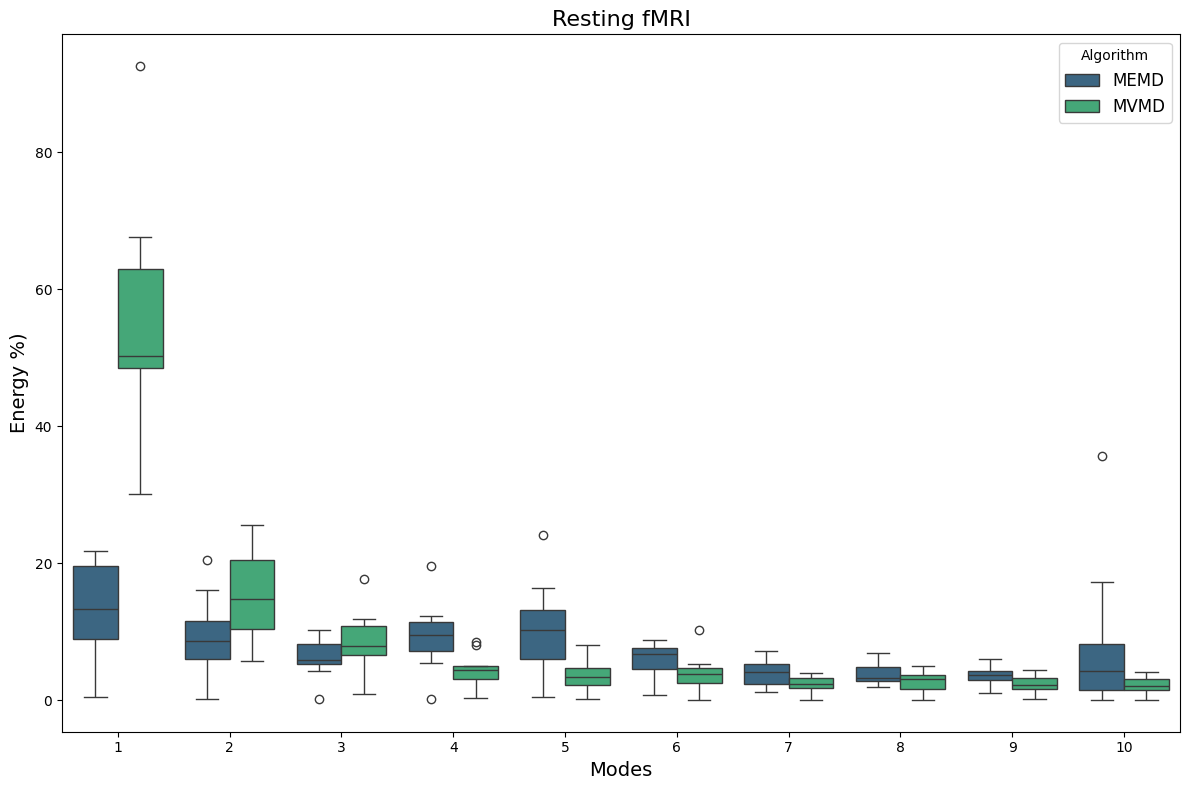

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat

num_modes = 10                         
num_subjects = 10                      

from scipy.signal import welch

def calculate_central_frequency(data, fs):
    central_frequencies = []
    for channel in range(data.shape[1]):
        freqs, psd = welch(data[:, channel], fs=fs)
        
        central_freq = np.sum(freqs * psd) / np.sum(psd)
        central_frequencies.append(central_freq)
    return np.mean(central_frequencies)

all_central_frequencies = []

folder = '/Users/kostasvos/Downloads/MEMD results'
sampling_rate = 1 / 0.72

data = []

    
# MEMD
for i in range(0, num_subjects):
    u = np.load(f'{folder}/imf_data_{i}.npy')
    
    mode_energies = np.sum(np.abs(u)**2, axis=(1, 2))
    total_energy=np.sum(mode_energies)
    #print(mode_energies)
    energies = (mode_energies / total_energy) * 100  
    # Add the data for all modes
    for mode_idx, energy in enumerate(energies, start=1):
        data.append({
            'Kind': 'MEMD',
            'Mode': mode_idx,
            'Energy': energy
        })


# MVMD
folder_name = f"New_Results_K_{10}"
for i in range(1, num_subjects + 1):
    u_file = f"{folder_name}/u_subject_{i}.mat"
    data_mat = loadmat(u_file)
    u = data_mat['u']
    mode_energies = np.sum(np.abs(u)**2, axis=(1, 2))
    total_energy=np.sum(mode_energies)
    #print(mode_energies)
    energies = (mode_energies / total_energy) * 100  
    for mode_idx, energy in enumerate(energies, start=1):
        data.append({
            'Kind': 'MVMD',
            'Mode': mode_idx,
            'Energy': energy
        })


df = pd.DataFrame(data)
df = df[df['Mode'] <= 10]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Mode", y="Energy", hue="Kind", palette="viridis")

plt.xlabel("Modes", fontsize=14)
plt.ylabel("Energy %)", fontsize=14)
plt.title("Resting fMRI", fontsize=16)
plt.legend(title="Algorithm", fontsize=12)
plt.tight_layout()
plt.savefig('./Figures/energy_memdmvmd')

plt.show()

## Average Frequencies for K=10, alpha = 1000

In [28]:
import numpy as np
import scipy.io
import os

fs = 1 / 0.72  
fs_mhz = fs * 1000

average_frequencies = []  
bandwidths = []           

total_avg_freqs = None
total_bwidths = None
subject_count = 0

for i in range(1, num_subjects + 1):
    u_file = f"New_Results_K_10/u_subject_{i}.mat"
    data_mat = loadmat(u_file)
    u = data_mat['u']
    
    K, T, C = u.shape
    freq_axis = np.linspace(0, fs_mhz / 2, T // 2 + 1)

    avg_freqs = np.zeros((K, C))  
    bwidths = np.zeros((K, C))    

    for k in range(K):
        for c in range(C):
            
            mode_signal = u[k, :, c]

            
            fft_values = np.fft.fft(mode_signal)
            power_spectrum = np.abs(fft_values[:T // 2 + 1])**2
            
            
            power_spectrum /= np.sum(power_spectrum)

            
            avg_freqs[k, c] = np.sum(freq_axis * power_spectrum)

            
            bwidths[k, c] = np.sqrt(np.sum(((freq_axis - avg_freqs[k, c])**2) * power_spectrum))

    
    if total_avg_freqs is None:
        total_avg_freqs = avg_freqs
        total_bwidths = bwidths
    else:
        total_avg_freqs += avg_freqs
        total_bwidths += bwidths

    subject_count += 1


average_frequencies = total_avg_freqs / subject_count
bandwidths = total_bwidths / subject_count
print("Average Frequencies Across All Subjects (mHz):")
print(average_frequencies)

print("\nBandwidths Across All Subjects (mHz):")
print(bandwidths)

Average Frequencies Across All Subjects (mHz):
[[  4.78922654   4.95065063   5.13369804 ...   5.13872039   5.83676634
    4.91851377]
 [ 28.05408661  28.32056451  27.7694548  ...  28.41795194  27.42856028
   28.32268579]
 [ 60.26371424  61.31175779  60.93288682 ...  62.15460757  62.44801022
   64.2771597 ]
 ...
 [446.07004409 446.18791142 446.23973156 ... 445.48899026 445.49512036
  445.29702678]
 [544.84508636 544.4905312  545.44057296 ... 545.59801049 545.02611019
  544.30589363]
 [630.96670414 629.45847158 630.58674418 ... 631.11152502 631.46339971
  631.41127289]]

Bandwidths Across All Subjects (mHz):
[[15.76853213 14.34490899 14.43516569 ... 19.64226756 19.96882496
  15.95240492]
 [20.30655377 19.86654974 17.12652982 ... 16.72756996 16.03658683
  20.23318182]
 [14.56166646 17.33304387 15.67682281 ... 14.81353105 14.27201972
  22.51692238]
 ...
 [22.4103091  22.75568234 22.21110779 ... 22.71849713 22.86292802
  21.03310689]
 [21.75833592 22.69613979 22.62182594 ... 23.18187118 22.